In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc

In [8]:
df_combined=pd.read_csv("Clustered_Mails_BERTopic.csv")
df_combined.set_index("ID",inplace=True)
df_combined.drop(["Unnamed: 0"],axis=1,inplace=True)
df_combined.rename(columns={'Topic':"isImportant"}, inplace=True)
df_combined=df_combined.replace({'Status': {'Read': True, 'Unread': False}})
df_combined

,isImportant,Date,Sender,Subject,EmailSize,Status,isSubscription,isEncrypted,isFlagged,AttachmentCount,AttachmentSize,isPrimaryRecipient,NoOfToValues,isCC,NoOfCCValues,isBCC
ID,,,,,,,,,,,,,,,,
A1,1,2022-03-10 09:50:34-08:00,googlecommunityteam-noreply@google.com,"Dmml, finish setting up your new Google Account",81274,True,False,False,False,0,0,True,1,False,0,False
A2,0,2022-03-11 06:46:10+11:00,DailyDigest@email.join1440.com,You're in! Here's how 1440 works...,36157,False,True,False,False,0,0,True,1,False,0,False
A5,0,2022-03-10 19:49:16+00:00,dave@davenetics.com,Verify Your Email Address for NextDraft,23484,False,False,False,False,0,0,True,1,False,0,False
A6,0,2022-03-10 19:50:00+00:00,dave@davenetics.com,NextDraft: Subscription Confirmed,23434,False,False,False,False,0,0,True,1,False,0,False
A7,0,2022-03-11 06:51:13+11:00,yo@gettheelevator.com,Welcome to ELEVATOR,29669,False,True,False,False,0,0,True,1,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A2109,1,2022-04-24 12:18:13-07:00,google-noreply@google.com,"Dmml, take the next step on your Windows by co...",33029,False,True,False,False,0,0,True,1,False,0,False
A2110,1,2022-04-24 19:30:49+00:00,no-reply@accounts.google.com,Critical security alert,11756,False,False,False,False,0,0,True,1,False,0,False
A2111,1,2022-04-24 12:34:10-07:00,nciarunprasath@gmail.com,Subject Line: Here’s your free [lead magnet type],5669,False,False,False,False,0,0,False,1,True,1,False


In [25]:
df_X = df_combined.loc[:, 'EmailSize':'isBCC'].to_numpy(dtype ='int32')
df_y = df_combined.loc[:, 'isImportant'].to_numpy(dtype ='int32')
df_Xtrain, df_Xtest, df_Ytrain, df_Ytest = train_test_split(df_X, df_y, test_size=0.2,random_state=42,stratify=df_combined["isImportant"], shuffle=True)

In [26]:
scaler = StandardScaler()
df_Xtrain = scaler.fit_transform(df_Xtrain)
df_Xtest = scaler.transform(df_Xtest)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

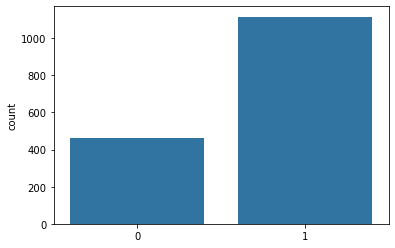

In [27]:
sns.countplot(df_Ytrain, color="C0")

In [159]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=12))
model.add(Dense(6, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [160]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 7)                 91        
                                                                 
 dense_51 (Dense)            (None, 6)                 48        
                                                                 
 dense_52 (Dense)            (None, 7)                 49        
                                                                 
 dense_53 (Dense)            (None, 1)                 8         
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [169]:
history = model.fit(df_Xtrain,df_Ytrain,validation_split = 0.1, epochs=10, batch_size=10)

Epoch 1/10
143/143 [==============================] - 0s 926us/step - loss: 0.4012 - accuracy: 0.8615 - val_loss: 0.3361 - val_accuracy: 0.8924
Epoch 2/10
143/143 [==============================] - 0s 662us/step - loss: 0.4074 - accuracy: 0.8615 - val_loss: 0.3351 - val_accuracy: 0.8924
Epoch 3/10
143/143 [==============================] - 0s 634us/step - loss: 0.4055 - accuracy: 0.8615 - val_loss: 0.3413 - val_accuracy: 0.8924
Epoch 4/10
143/143 [==============================] - 0s 634us/step - loss: 0.3989 - accuracy: 0.8615 - val_loss: 0.3590 - val_accuracy: 0.8924
Epoch 5/10
143/143 [==============================] - 0s 637us/step - loss: 0.4114 - accuracy: 0.8615 - val_loss: 0.3430 - val_accuracy: 0.8924
Epoch 6/10
143/143 [==============================] - 0s 630us/step - loss: 0.4094 - accuracy: 0.8615 - val_loss: 0.3344 - val_accuracy: 0.8924
Epoch 7/10
143/143 [==============================] - 0s 736us/step - loss: 0.4060 - accuracy: 0.8615 - val_loss: 0.3331 - val_accuracy:

In [162]:
model.evaluate(df_Xtrain,df_Ytrain)

50/50 [==============================] - 0s 429us/step - loss: 0.3933 - accuracy: 0.8646


[0.3932669758796692, 0.8645569682121277]

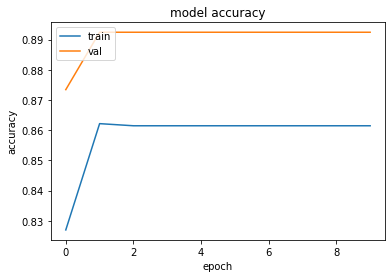

In [163]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

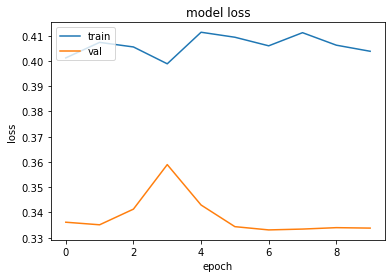

In [170]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [172]:
output=model.predict(df_Xtest)
output
pred=[1 if i>0.5 else 0 for i in output]

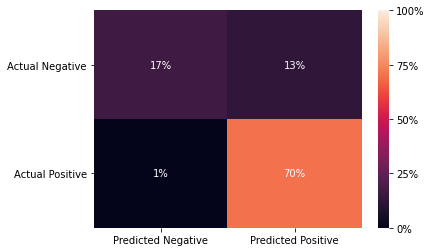

In [173]:
confusion = pd.DataFrame(confusion_matrix(df_Ytest, pred))
confusion = confusion.div(confusion.sum().sum())
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
ax = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt=".0%")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.set_ticks((0, .25, .5, .75, 1))
ax.collections[0].colorbar.set_ticklabels(("0%", "25%", "50%", "75%", "100%"))

In [167]:
print(classification_report(df_Ytest, pred))

              precision    recall  f1-score   support

           0       0.96      0.57      0.71       116
           1       0.85      0.99      0.91       280

    accuracy                           0.87       396
   macro avg       0.90      0.78      0.81       396
weighted avg       0.88      0.87      0.85       396



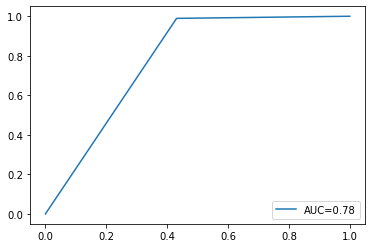

In [188]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(df_Ytest, pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras,nn_tpr_keras,label="AUC="+str(round(auc_keras,2)))
plt.legend(loc=4)
plt.show()